In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# EDA

In [3]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
float_vals = train_df.dtypes[train_df.dtypes != 'object'].keys()
float_vals = float_vals[1::]

In [5]:
float_vals

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

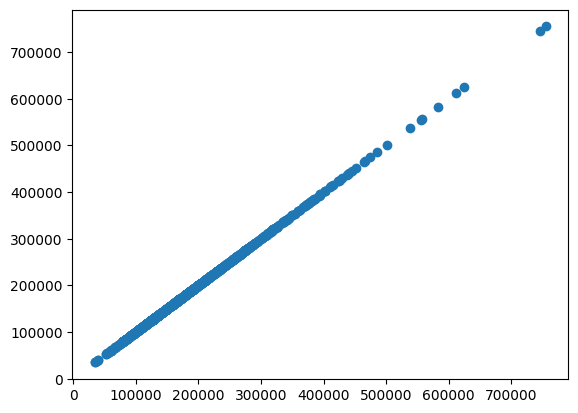

In [6]:
plt.scatter(x = 'SalePrice', y = 'SalePrice', data = train_df)

## Removing Outliers and Unnecessary values

In [8]:
values = [935, 1299, 250, 314, 336, 707, 452, 524, 379, 186, 323, 739, 955, 598, 636, 955, 1341, 1062, 54, 496, 1329, 198, 1386, 1424, 347, 706, 1231, 1458, 1183, 692, 298]

In [9]:
train_df = train_df[train_df.Id.isin(values) == False]

In [10]:
pd.DataFrame(train_df.isnull().sum().sort_values(ascending = False)).head(20)

,0
PoolQC,1427
MiscFeature,1384
Alley,1342
Fence,1159
MasVnrType,852
FireplaceQu,681
LotFrontage,253
GarageYrBlt,76
GarageCond,76
GarageType,76


In [11]:
train_df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [12]:
train_df['Alley'].fillna('No', inplace = True)
test_df['Alley'].fillna('No', inplace = True)

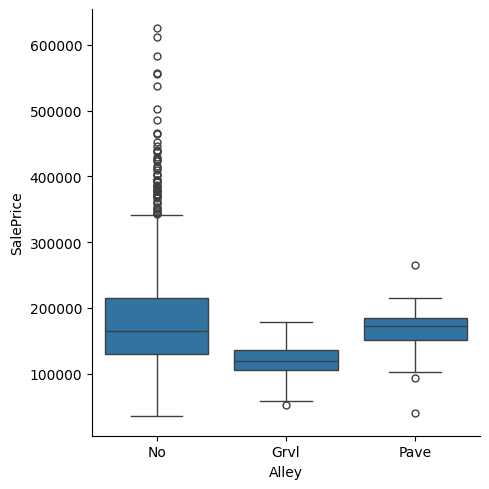

In [13]:
sns.catplot(data = train_df, x = 'Alley', y = 'SalePrice', kind = 'box')

In [14]:
train_df.query('Alley == "Pave"').count()

Id               39
MSSubClass       39
MSZoning         39
LotFrontage      37
LotArea          39
                 ..
MoSold           39
YrSold           39
SaleType         39
SaleCondition    39
SalePrice        39
Length: 81, dtype: int64

In [15]:
train_df['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [16]:
train_df['Fence'].fillna('No', inplace = True)
test_df['Fence'].fillna('No', inplace = True)

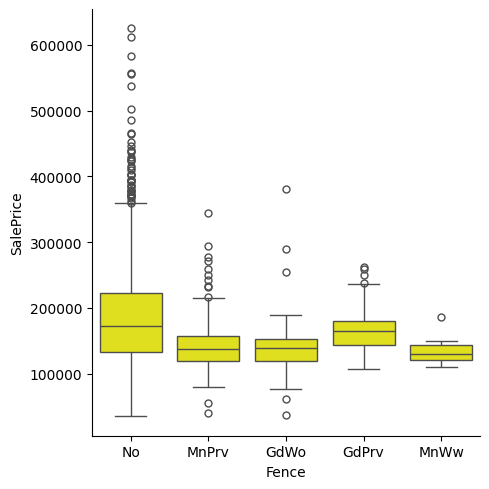

In [17]:
sns.catplot(data = train_df, x = 'Fence', y = 'SalePrice', color = 'yellow', kind = 'box')

In [18]:
train_df['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [19]:
train_df['MasVnrType'].fillna('No', inplace = True)
test_df['MasVnrType'].fillna('No', inplace = True)

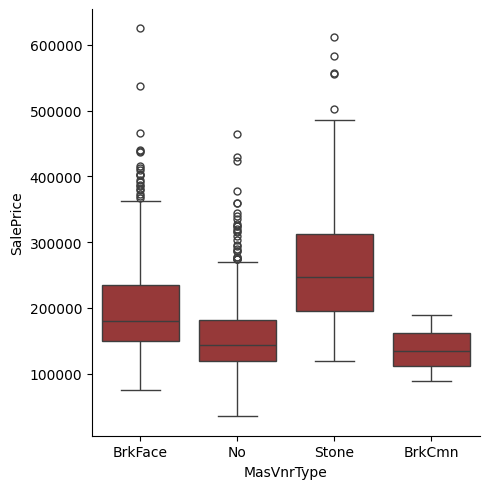

In [20]:
sns.catplot(data = train_df, x = 'MasVnrType', y = 'SalePrice', color = 'brown', kind = 'box')

In [21]:
train_df['MasVnrArea'].fillna(0, inplace = True)
test_df['MasVnrArea'].fillna(0, inplace = True)

In [22]:
train_df['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [23]:
train_df['FireplaceQu'].fillna('No', inplace = True)
test_df['FireplaceQu'].fillna('No', inplace = True)

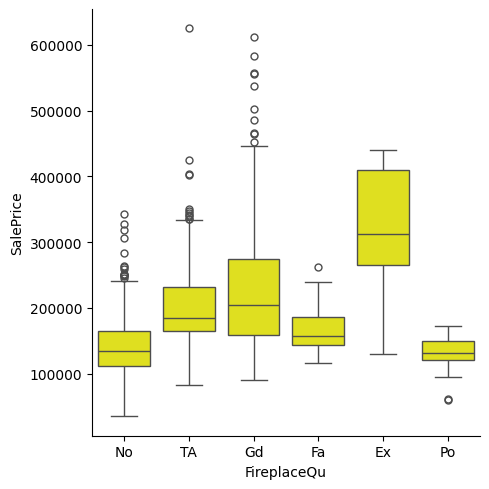

In [24]:
sns.catplot(data = train_df, x = 'FireplaceQu', y = 'SalePrice', color = 'yellow', kind = 'box')

In [25]:
train_df['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79.,  99.,  67.,
        83.,  43., 103., 174.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,  38.,
       109., 130.,  53., 137.,  45., 106.,  42.,  39., 104., 144., 114.,
       128., 149., 168., 182., 138., 152., 124., 153.,  46.])

In [26]:
train_df['LotFrontage'].fillna(0, inplace = True)
test_df['LotFrontage'].fillna(0, inplace = True)

In [27]:
train_df['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [28]:
train_df['GarageCond'].fillna('No', inplace = True)
test_df['GarageCond'].fillna('No', inplace = True)

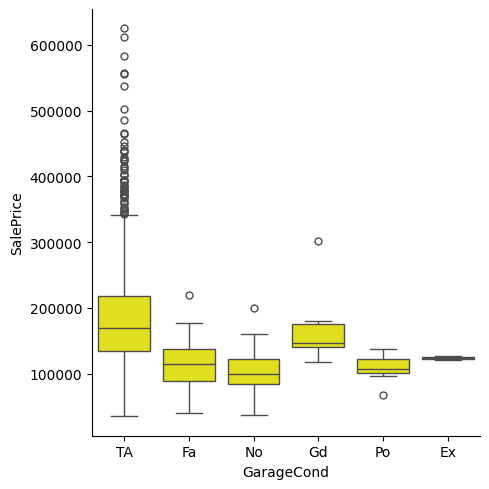

In [29]:
sns.catplot(data = train_df, x = 'GarageCond', y = 'SalePrice', color = 'yellow', kind = 'box')

In [30]:
train_df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [31]:
train_df['GarageType'].fillna('No', inplace = True)
test_df['GarageType'].fillna('No', inplace = True)

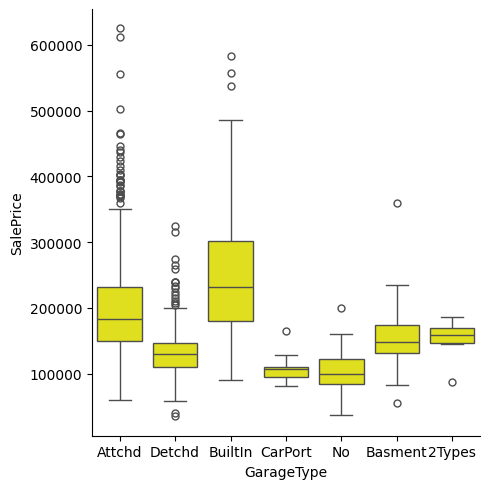

In [32]:
sns.catplot(data = train_df, x = 'GarageType', y = 'SalePrice', color = 'yellow', kind = 'box')

In [33]:
train_df['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [34]:
train_df['GarageFinish'].fillna('No', inplace = True)
test_df['GarageFinish'].fillna('No', inplace = True)

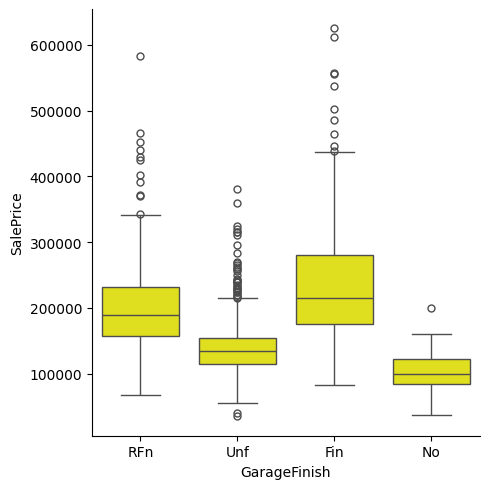

In [35]:
sns.catplot(data = train_df, x = 'GarageFinish', y = 'SalePrice', color = 'yellow', kind = 'box')

In [36]:
train_df['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Po', 'Ex'], dtype=object)

In [37]:
train_df['GarageQual'].fillna('No', inplace = True)
test_df['GarageQual'].fillna('No', inplace = True)

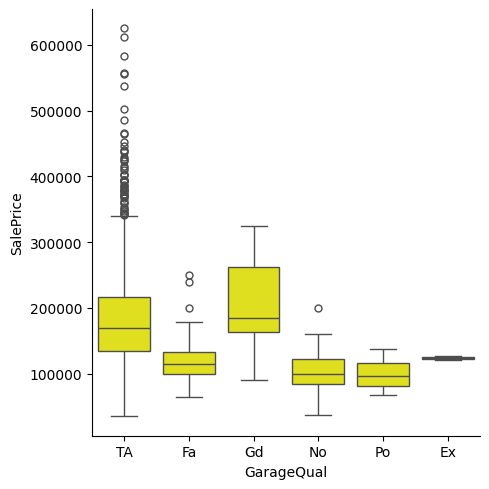

In [38]:
sns.catplot(data = train_df, x = 'GarageQual', y = 'SalePrice', color = 'yellow', kind = 'box')

In [39]:
train_df['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [40]:
train_df['BsmtFinType2'].fillna('Unf', inplace = True)
test_df['BsmtFinType2'].fillna('Unf', inplace = True)

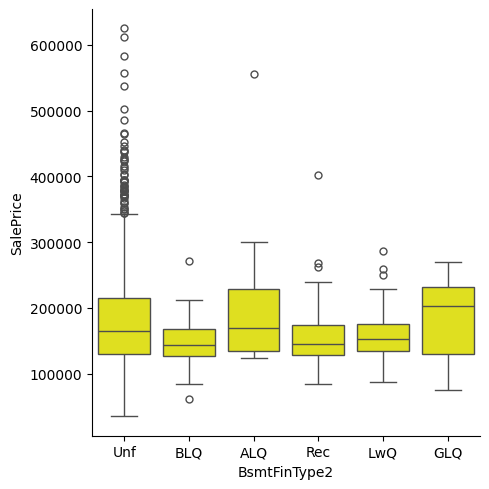

In [41]:
sns.catplot(data = train_df, x = 'BsmtFinType2', y = 'SalePrice', color = 'yellow', kind = 'box')

In [42]:
train_df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [43]:
train_df['BsmtExposure'].fillna('No', inplace = True)
test_df['BsmtExposure'].fillna('No', inplace = True)

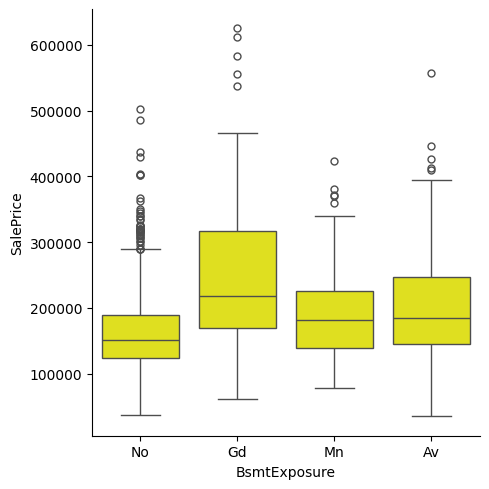

In [44]:
sns.catplot(data = train_df, x = 'BsmtExposure', y = 'SalePrice', color = 'yellow', kind = 'box')

In [45]:
train_df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [46]:
train_df['BsmtQual'].fillna('No', inplace = True)
test_df['BsmtQual'].fillna('No', inplace = True)

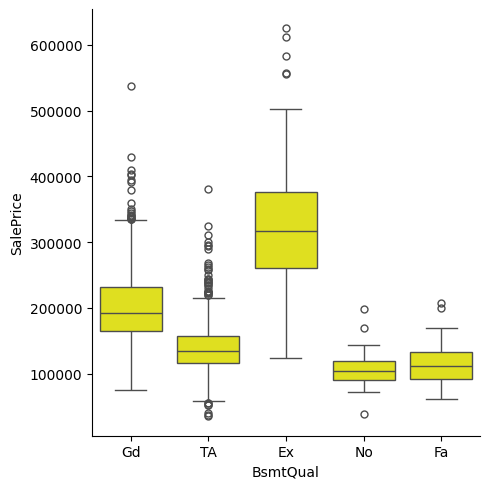

In [47]:
sns.catplot(data = train_df, x = 'BsmtQual', y = 'SalePrice', color = 'yellow', kind = 'box')

In [48]:
train_df['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [49]:
train_df['BsmtCond'].fillna('No', inplace = True)
test_df['BsmtCond'].fillna('No', inplace = True)

In [50]:
train_df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [51]:
train_df['BsmtFinType1'].fillna('Unf', inplace = True)
test_df['BsmtFinType1'].fillna('Unf', inplace = True)

In [52]:
train_df['MasVnrArea'].unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [53]:
train_df['MasVnrArea'].fillna(0, inplace = True)
test_df['MasVnrArea'].fillna(0, inplace = True)

In [54]:
train_df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [55]:
train_df['Electrical'].fillna('SBrkr', inplace = True)
test_df['Electrical'].fillna('SBrkr', inplace = True)

In [56]:
# Dropping unneded variables
train_df = train_df.drop(columns= ['PoolQC', 'MiscFeature', 'Fence', 'Alley', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])
test_df = test_df.drop(columns= ['PoolQC', 'MiscFeature', 'Fence', 'Alley', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])

### Feature Engineering

In [57]:
train_df['houseage'] = train_df['YrSold'] - train_df['YearBuilt']
test_df['houseage'] = test_df['YrSold'] - test_df['YearBuilt']

In [58]:
train_df['housermodelage'] = train_df['YrSold'] - train_df['YearRemodAdd']
test_df['housermodelage'] = test_df['YrSold'] - test_df['YearRemodAdd']

In [59]:
train_df['totalsf'] = train_df['1stFlrSF'] +  train_df['2ndFlrSF'] + train_df['BsmtFinSF1'] +  train_df['BsmtFinSF2']
test_df['totalsf'] = test_df['1stFlrSF'] +  test_df['2ndFlrSF'] + test_df['BsmtFinSF1'] +  test_df['BsmtFinSF2']

In [60]:
train_df['totalarea'] = train_df['GrLivArea'] + train_df['TotalBsmtSF']
test_df['totalarea'] = test_df['GrLivArea'] + test_df['TotalBsmtSF']

In [61]:
train_df['totalbaths'] = train_df['BsmtFullBath'] + train_df['FullBath'] + 0.5 * (train_df['BsmtHalfBath'] + train_df['HalfBath'])
test_df['totalbaths'] = test_df['BsmtFullBath'] + test_df['FullBath'] + 0.5 * (test_df['BsmtHalfBath'] + test_df['HalfBath'])

In [62]:
train_df['totalprorchsf'] = train_df['OpenPorchSF'] + train_df['3SsnPorch'] + train_df['EnclosedPorch'] + train_df['ScreenPorch']
test_df['totalprorchsf'] = test_df['OpenPorchSF'] + test_df['3SsnPorch'] + test_df['EnclosedPorch'] + test_df['ScreenPorch']

In [63]:
# Dropping feature engineered variable
train_df = train_df.drop(columns= ['Id', 'YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF', 'BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch'])
test_df = test_df.drop(columns= ['YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF', 'BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch'])

### Running a Correlation Matrix

<Axes: >

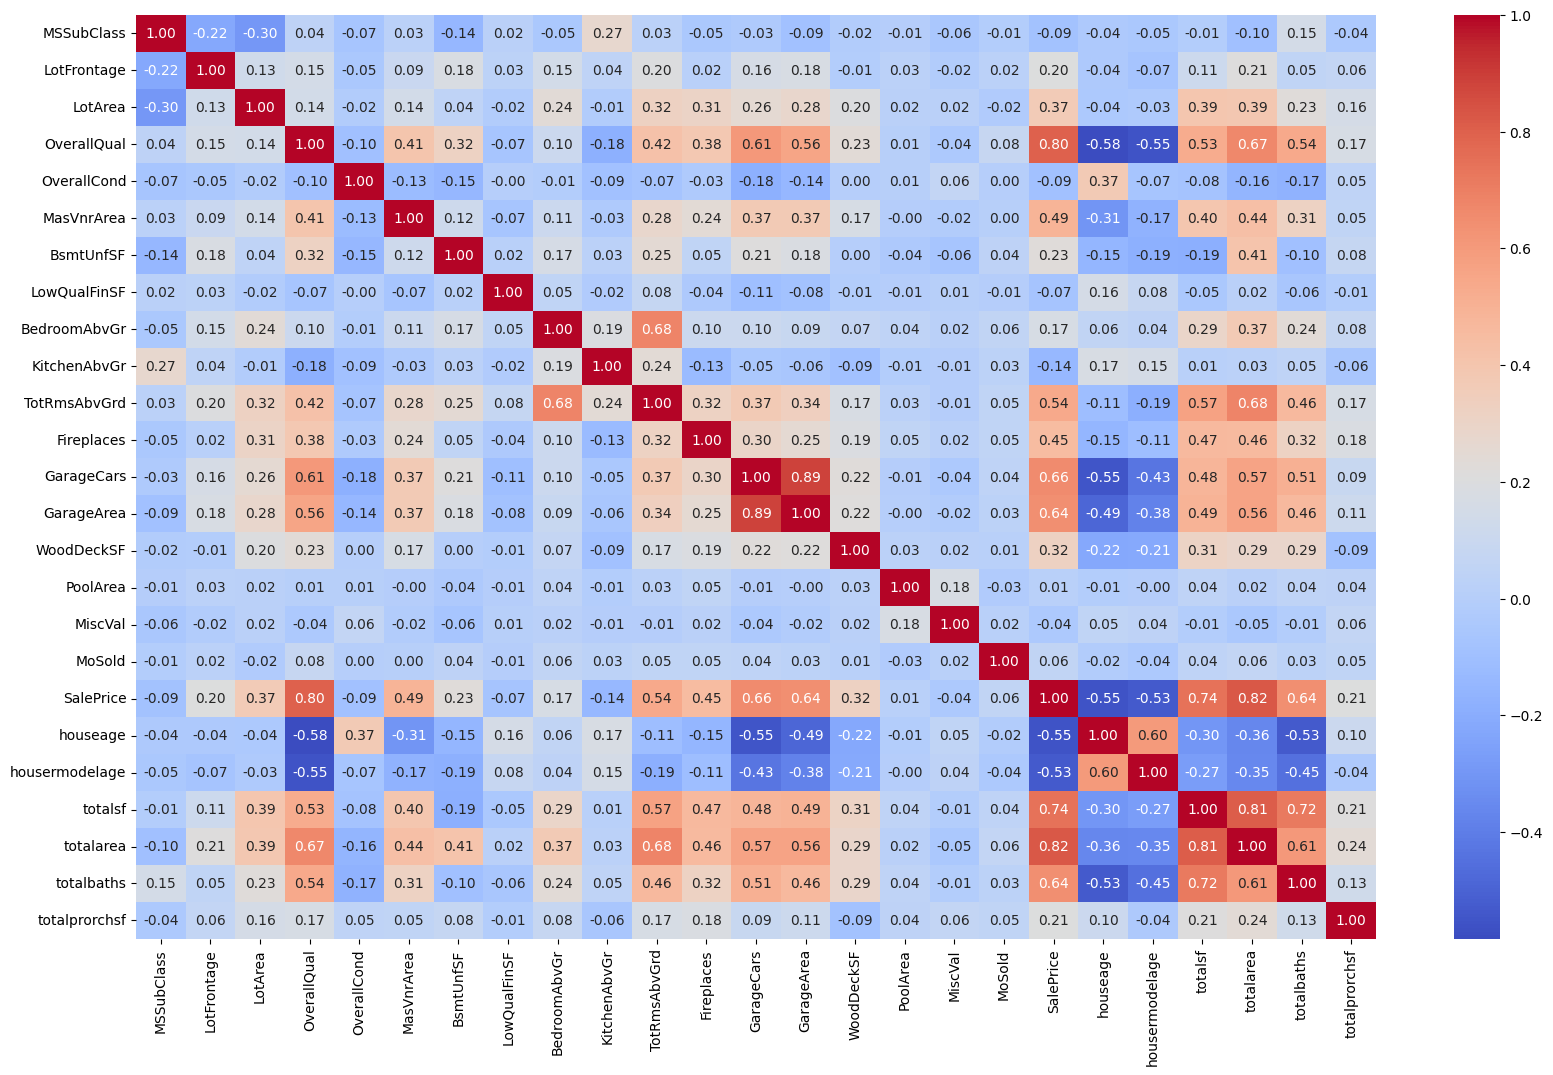

In [64]:
correlation_matrix = train_df.corr(numeric_only=True)
plt.figure(figsize = (20, 12))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt= '.2f')

In [65]:
# Drop the highly correlated values
train_df = train_df.drop(columns= ['GarageCars'])
test_df = test_df.drop(columns= ['GarageCars'])

### Applying logartithmic values to sales price

<Axes: xlabel='SalePrice', ylabel='Count'>

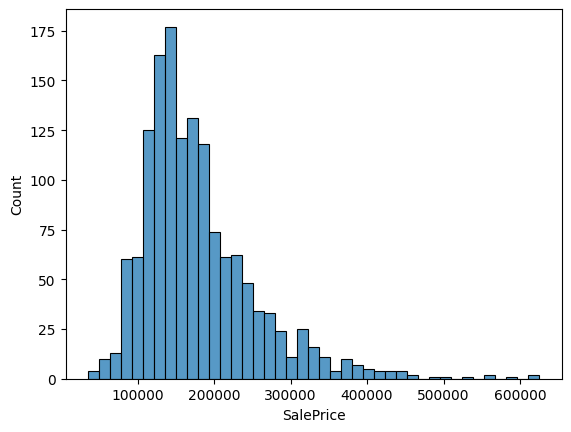

In [66]:
sns.histplot(
    train_df,
    x = train_df['SalePrice']
)

In [67]:
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

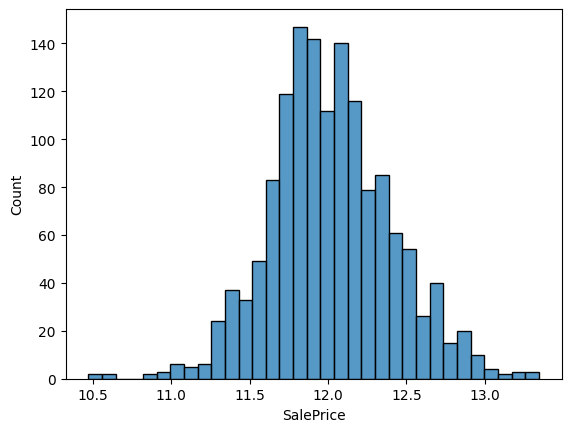

In [68]:
sns.histplot(
    train_df,
    x = train_df['SalePrice']
)

### Check categorical variables and doing encodings

In [69]:
train_df.dtypes[train_df.dtypes == 'object']

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [70]:
# Ordinal encoding
ode_cols = ['LotShape', 'LandContour', 'Utilities', 'LandSlope', 'BsmtQual', 'BsmtFinType1', 'CentralAir', 'Functional', 
            'FireplaceQu', 'GarageFinish', 'GarageQual', 'PavedDrive', 'ExterCond', 'KitchenQual', 'BsmtExposure',
           'HeatingQC', 'ExterQual', 'BsmtCond']

In [71]:
# One Hot Encoding
ohe_cols = ['Street', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
           'Exterior2nd', 'MasVnrType', 'Foundation', 'Electrical', 'SaleType', 'MSZoning', 'SaleCondition', 'Heating', 'GarageType',
           'RoofMatl']

In [72]:
num_cols = train_df.select_dtypes(include = ['int64', 'float64']).columns
num_cols = num_cols.drop('SalePrice')

### Pipelines and Preprocessing

In [73]:
num_pipeline = Pipeline(steps = [
    ('impute', SimpleImputer(strategy = 'mean')),
    ('scaler', StandardScaler())
])

In [74]:
ode_pipeline = Pipeline(steps = [
    ('impute', SimpleImputer(strategy = 'most_frequent')),
    ('ode', OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1))
])

In [75]:
ohe_pipeline = Pipeline(steps = [
    ('impute', SimpleImputer(strategy = 'most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown = 'ignore', sparse_output = False))
])

In [76]:
col_trans = ColumnTransformer(transformers = [
    ('num_p', num_pipeline, num_cols),
    ('ode_p', ode_pipeline, ode_cols),
    ('ohe_p', ohe_pipeline, ohe_cols)
    ], 
    remainder = 'passthrough',
    n_jobs = -1)

In [77]:
pipeline = Pipeline(steps = [
    ('preprocessing', col_trans)
])

In [78]:
X = train_df.drop('SalePrice', axis = 1)
y = train_df['SalePrice']

In [79]:
X_preprocessed = pipeline.fit_transform(X)

In [80]:
X_preprocessed

array([[ 0.07837475,  0.2400657 , -0.29214012, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87142097,  0.6950409 , -0.06321298, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07837475,  0.33106074,  0.26524769, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.87142097,  0.84669929,  0.6484518 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.87142097,  0.33106074, -0.03992214, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87142097,  0.5433825 ,  0.00387262, ...,  0.        ,
         0.        ,  0.        ]])

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size = 0.15, random_state = 25)

### Training and building models

#### Linear Regression

In [82]:
lr = LinearRegression()

In [83]:
lr.fit(X_train, y_train)

LinearRegression()

In [84]:
y_pred_lr = lr.predict(X_test)

In [85]:
mean_squared_error(y_test, y_pred_lr)

2.165867562053341e+19

#### Random Forest Regression

In [86]:
rfr = RandomForestRegressor(random_state = 13)

In [87]:
param_grid_rfr = {
    'max_depth' : [5, 10, 15],
    'n_estimators' : [100, 250, 500],
    'min_samples_split' : [3, 5, 10]
}

In [88]:
rfr_cv = GridSearchCV(rfr, param_grid_rfr, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1)

In [89]:
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=13), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [100, 250, 500]},
             scoring='neg_mean_squared_error')

In [90]:
y_pred_rfr = rfr_cv.predict(X_test)

In [91]:
np.sqrt(-1 * rfr_cv.best_score_)

0.13165891186090467

In [92]:
rfr_cv.best_params_

{'max_depth': 15, 'min_samples_split': 3, 'n_estimators': 500}

#### XGBoost Regressor

In [93]:
xgb = XGBRegressor(random_state = 13)

In [94]:
param_grind_xgb = {
    'learning_rate' : [0.03, 0.09, 0.2],
    'n_estimators' : [300, 500],
    'max_depth' : [3, 6],
    'min_child_weight' : [1, 2, 3],
    'gamma' : [0, 0.1, 0.2],
    'subsample' : [0.8, 0.9, 1.0],
    'colsample_bytree' : [0.8, 0.9, 1.0],
}

In [95]:
xgb_cv = GridSearchCV(xgb, param_grind_xgb, cv = 3, scoring = 'neg_mean_squared_error', n_jobs = -1)

In [96]:
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=13, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.03, 0.09, 0.2],
                         'max_depth': [3, 6], 'min_child_weight': [1, 2, 3],
                         'n_estimators': [300, 500],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [97]:
np.sqrt(-1 * xgb_cv.best_score_)

0.11302305263552455

#### Ridge Regressor

In [98]:
ridge = Ridge(random_state= 13)

In [99]:
param_grid_ridge = {
    'alpha' : [0.05, 0.1, 1, 3, 5, 10],
    'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']   
}

In [100]:
ridge_cv = GridSearchCV(ridge, param_grid_ridge, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1)

In [101]:
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(random_state=13), n_jobs=-1,
             param_grid={'alpha': [0.05, 0.1, 1, 3, 5, 10],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag']},
             scoring='neg_mean_squared_error')

In [102]:
np.sqrt(-1 * ridge_cv.best_score_)

0.11135160396303438

#### Gradient Boosting Regressor

In [103]:
gbr = GradientBoostingRegressor(random_state = 13)

In [104]:
param_grid_gbr = {
    'max_depth' : [11, 15, 20],
    'n_estimators' : [200, 400, 1000],
    'min_samples_leaf' : [10, 25, 50],
    'learning_rate' : [0.001, 0.01, 0.1],
    'max_features' : [0.01, 0.1, 0.7]
}

In [105]:
gbr_cv = GridSearchCV(gbr, param_grid_gbr, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1)

In [106]:
gbr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=13),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [11, 15, 20],
                         'max_features': [0.01, 0.1, 0.7],
                         'min_samples_leaf': [10, 25, 50],
                         'n_estimators': [200, 400, 1000]},
             scoring='neg_mean_squared_error')

In [107]:
np.sqrt(-1 * gbr_cv.best_score_)

0.11411532469811975

#### LGBM Regressor

In [108]:
lgbmr = lgb.LGBMRegressor()

In [109]:
param_grid_lgbmr = {
    'boosting_type' : ['gbdt', 'dart'],
    'num_leaves' : [20, 30, 40],
    'learning_rate' : [0.01, 0.05, 0.1],
    'n_estimators' : [100, 200, 300]
}

In [110]:
lgbmr_cv = GridSearchCV(lgbmr, param_grid_lgbmr, cv = 3, scoring = 'neg_mean_squared_error', n_jobs = -1)

In [111]:
lgbmr_cv.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000815 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2287
[LightGBM] [Info] Number of data points in the train set: 1215, number of used features: 116
[LightGBM] [Info] Start training from score 12.020772


GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [20, 30, 40]},
             scoring='neg_mean_squared_error')

In [112]:
np.sqrt(-1 * lgbmr_cv.best_score_)

0.12312292543466906

#### Cat Boost Regressor

In [113]:
catboost = CatBoostRegressor(loss_function = 'RMSE', verbose = False)

In [114]:
pram_grid_cat = {
    'iterations' : [100, 500, 1000],
    'depth' : [4, 6, 8, 10],
    'learning_rate' : [0.01, 0.05, 0.1, 0.5]
}

In [115]:
cat_cv = GridSearchCV(catboost, pram_grid_cat, cv = 3, scoring = 'neg_mean_squared_error', n_jobs = -1)

In [116]:
cat_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x000002C5AFBB62B0>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8, 10], 'iterations': [100, 500, 1000],
                         'learning_rate': [0.01, 0.05, 0.1, 0.5]},
             scoring='neg_mean_squared_error')

In [117]:
np.sqrt(-1 * cat_cv.best_score_)

0.11317322165243815

### Voting regressor (Putting best models together)

In [118]:
vr = VotingRegressor([('gbr', gbr_cv.best_estimator_),
                      ('xgb', xgb_cv.best_estimator_),
                      ('ridge', ridge_cv.best_estimator_)],
                        weights = [2, 1, 3])

In [119]:
'''
ridge_sc = 0.11135160396303438
xgb_sc = 0.11302305263552455
gbr_sc = 0.11411532469811975
'''

'\nridge_sc = 0.11135160396303438\nxgb_sc = 0.11302305263552455\ngbr_sc = 0.11411532469811975\n'

In [120]:
vr.fit(X_train, y_train)

VotingRegressor(estimators=[('gbr',
                             GradientBoostingRegressor(learning_rate=0.01,
                                                       max_depth=11,
                                                       max_features=0.1,
                                                       min_samples_leaf=10,
                                                       n_estimators=1000,
                                                       random_state=13)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.8, device=None,
                                          early_stopping_rounds=None,
                                          enable_categori...
                                          learning_rate=0.09, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=3,
                                          max_leaves=None, min_child_weight=2,
                                          missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=300,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=13, ...)),
                            ('ridge',
                             Ridge(alpha=10, random_state=13, solver='lsqr'))],
                weights=[2, 1, 3])

In [121]:
y_pred_vr = vr.predict(X_test)

In [122]:
mean_squared_error(y_pred_vr, y_test, squared = False)

0.1187657242655824

### Stacking Regressor

In [123]:
estimators = [
    ('gbr', gbr_cv.best_estimator_),
    ('xgb', xgb_cv.best_estimator_),
    ('cat', cat_cv.best_estimator_),
    ('lgb', lgbmr_cv.best_estimator_),
    ('rfr', rfr_cv.best_estimator_),
]

In [124]:
stackreg = StackingRegressor(
    estimators = estimators,
    final_estimator = vr
)

In [125]:
stackreg.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000551 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2287
[LightGBM] [Info] Number of data points in the train set: 1215, number of used features: 116
[LightGBM] [Info] Start training from score 12.020772
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000639 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2166
[LightGBM] [Info] Number of data points in the train set: 972, number of used features: 109
[LightGBM] [Info] Start training from score 12.024094
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000696 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2162
[LightGBM] [Info] Number of data points in the train set: 972, number of used features: 108
[LightGBM] [Info] Start tra

StackingRegressor(estimators=[('gbr',
                               GradientBoostingRegressor(learning_rate=0.01,
                                                         max_depth=11,
                                                         max_features=0.1,
                                                         min_samples_leaf=10,
                                                         n_estimators=1000,
                                                         random_state=13)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_catego...
                                                                            learning_rate=0.09,
                                                                            max_bin=None,
                                                                            max_cat_threshold=None,
                                                                            max_cat_to_onehot=None,
                                                                            max_delta_step=None,
                                                                            max_depth=3,
                                                                            max_leaves=None,
                                                                            min_child_weight=2,
                                                                            missing=nan,
                                                                            monotone_constraints=None,
                                                                            multi_strategy=None,
                                                                            n_estimators=300,
                                                                            n_jobs=None,
                                                                            num_parallel_tree=None,
                                                                            random_state=13, ...)),
                                                              ('ridge',
                                                               Ridge(alpha=10,
                                                                     random_state=13,
                                                                     solver='lsqr'))],
                                                  weights=[2, 1, 3]))

In [126]:
y_pred_stack = stackreg.predict(X_test)

In [158]:
mean_squared_error(y_pred_stack, y_test, squared = False)

0.12252399326712375

## Final Submission 

In [127]:
df_test_preprocess = pipeline.transform(test_df)

In [129]:
y_stacking = np.exp(stackreg.predict(df_test_preprocess))

df_y_stacking_out = test_df[['Id']]
df_y_stacking_out['SalePrice'] = y_stacking

df_y_stacking_out.to_csv('submission.csv', index = False)

C:\Users\micha\AppData\Local\Temp\ipykernel_2784\1803224423.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y_stacking_out['SalePrice'] = y_stacking
